C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

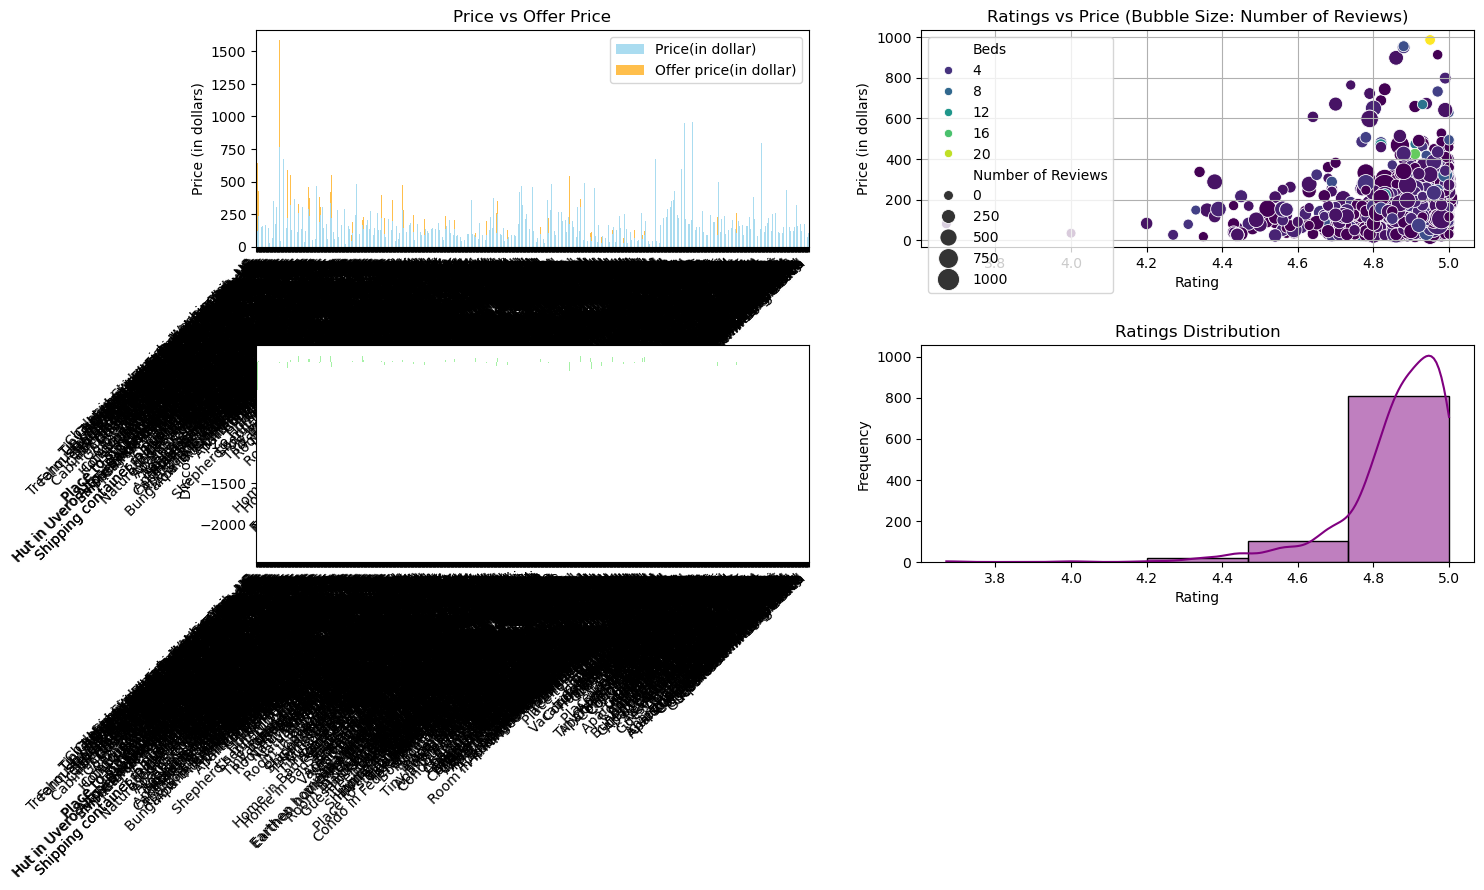

Summary of Analysis:

Average Price: $170.00
Average Rating: 4.86
Most Reviewed Listing: Villa in Nusa Ceningan, Indonesia with 1239 reviews


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Suppress font-related warnings
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

# Set font family to avoid glyph issues
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load dataset
file_path = r"C:\Users\PC\Downloads\listings.csv"
df = pd.read_csv(file_path)

# Data cleaning
df['Rating'] = df['Review and rating'].str.extract(r'(\d+\.\d+)').astype(float)
df['Number of Reviews'] = df['Review and rating'].str.extract(r'\((\d+)\)').astype(float)
df['Number of Reviews'] = df['Number of Reviews'].fillna(0).astype(int)
df['Beds'] = df['Number of bed'].str.extract(r'(\d+)').astype(int)
df['Price(in dollar)'] = pd.to_numeric(df['Price(in dollar)'], errors='coerce')
df['Offer price(in dollar)'] = pd.to_numeric(df['Offer price(in dollar)'], errors='coerce')
df['Discount (%)'] = ((df['Price(in dollar)'] - df['Offer price(in dollar)']) / df['Price(in dollar)']) * 100

# Analysis
avg_price = df['Price(in dollar)'].mean()
avg_rating = df['Rating'].mean()
most_reviews = df.loc[df['Number of Reviews'].idxmax()]

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
fig.tight_layout(pad=5.0)

# Bar chart for price vs offer price
ax1 = axes[0, 0]
df[['Price(in dollar)', 'Offer price(in dollar)']].plot(kind='bar', stacked=True, color=['skyblue', 'orange'], alpha=0.7, ax=ax1)
ax1.set_title('Price vs Offer Price')
ax1.set_ylabel('Price (in dollars)')
ax1.set_xlabel('Listings')
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Title'], rotation=45, ha='right')

# Scatter plot for ratings vs price
ax2 = axes[0, 1]
sns.scatterplot(data=df, x='Rating', y='Price(in dollar)', size='Number of Reviews', hue='Beds', palette='viridis', sizes=(50, 300), ax=ax2)
ax2.set_title('Ratings vs Price (Bubble Size: Number of Reviews)')
ax2.set_ylabel('Price (in dollars)')
ax2.set_xlabel('Rating')
ax2.grid(True)

# Discount percentage
ax3 = axes[1, 0]
df['Discount (%)'].plot(kind='bar', color='lightgreen', alpha=0.8, ax=ax3)
ax3.set_title('Discount Percentage by Listing')
ax3.set_ylabel('Discount (%)')
ax3.set_xticks(range(len(df)))
ax3.set_xticklabels(df['Title'], rotation=45, ha='right')

# Ratings distribution
ax4 = axes[1, 1]
sns.histplot(df['Rating'], bins=5, kde=True, color='purple', ax=ax4)
ax4.set_title('Ratings Distribution')
ax4.set_xlabel('Rating')
ax4.set_ylabel('Frequency')

plt.show()

# Summary of analysis
print("Summary of Analysis:")
print(f"\nAverage Price: ${avg_price:.2f}")
print(f"Average Rating: {avg_rating:.2f}")
print(f"Most Reviewed Listing: {most_reviews['Title']} with {most_reviews['Number of Reviews']} reviews")
